# Introduction
Welcome to this Python demonstration on time series modelling.

Time series modelling is a set of tools and techniques that model temporal or time series data and aim to predict or forecast future behavior of the data. It has applications in various fields such as finance, economics, weather forecasting, and more.

By analysing historical data, we can identify different components in time series data such as trends, seasonality, and so on, and use these insights to make more informed business decisions.

In this demonstration, we will explore a few different techniques for time series modelling. As we construct and evaluate our models, we'll gain insight into how different techniques can be used to handle common challenges in time series modelling.

By the end of this demonstration, you will have a solid understanding of how to build and evaluate time series models in Python, and how to apply these techniques to real-world data sets.

## Problem Statement
In  this demonstration, we will apply time series modelling techniques to a real-world problem that involves a company and its sales. The company has historical sales data that it has captured over a period of time and wishes to forecast future sales trends so that it may optimise its inventory management processes.

The problem statement for this demonstration can be summarised as follows:
> Given historical sales data of a company, forecast its future sales.

By studying the forecast, the company can effectively plan and prepare their inventory to ensure that the right amount of stock is made ready over future months.

## Data Description
You have been provided with a data set containing daily sales and profit data of the company for the period 2021 to 2024. The data set has the following three attributes:

<table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Order-Date </td>
    <td> The date on which the order was placed (in dd-mm-yyyy format) </td>
  </tr>
  <tr>
    <td> Sales </td>
    <td> Total sales value of the transaction (in dollars) </td>
  </tr>
  <tr>
    <td> Profit </td>
    <td> Profit made on the transaction (in dollars) </td>
  </tr>

</table>

## Outline
In this demonstration, we will:
- Prepare the data for time series modelling
- Forecast sales using the following models:
  - Autoregressive (AR)
  - Moving average (MA)
  - Autoregressive moving average (ARMA)
  - Autoregressive integrated moving average (ARIMA)
  - Seasonal autoregressive integrated moving average (SARIMA)
  - Recurrent neural network (RNN)

We will analyse the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

We will begin by importing all the packages that we will be using in this part of the demonstration, which are:
- *NumPy* and *Pandas* for working with numbers and dataframes
- *pyplot* from *matplotlib* and *seaborn* for visualisations
- *ConvergenceWarning* from *statsmodels* and *warnings* to suppress warnings

In [1]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualisations
from matplotlib import pyplot as plt
import seaborn as sns

# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

Let's begin by loading the data and building familiarity with it.

In [2]:
# Load the data and take a look at it
df = pd.read_csv('Superstore_Data.csv')
df.head()

,Order Date,Sales,Profit
0,17-10-2023,5175.171,919.971
1,07-11-2021,1822.080,564.840
2,14-04-2022,5244.840,996.480
3,06-06-2023,3701.520,1036.080
4,25-02-2022,1878.720,582.360


In [3]:
# View specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  5699 non-null   object 
 1   Sales       5699 non-null   float64
 2   Profit      5699 non-null   float64
dtypes: float64(2), object(1)
memory usage: 133.7+ KB


As you can see, the data type of the *Order Date* column is *object*. But to further conduct analyses on the data, such as grouping by month or year, we have to convert the data type of the *Order Date* column to *datetime*.

In [4]:
# Convert the 'Order Date' feature to the 'datetime' data type
df['Order Date'] = pd.to_datetime(arg = df['Order Date'])

In [5]:
# View specifics of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  5699 non-null   datetime64[ns]
 1   Sales       5699 non-null   float64       
 2   Profit      5699 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 133.7 KB


Let's make sure that the data points in the data frame are ordered by date.

In [6]:
# Ensure that the data are ordered chronologically
df.sort_values(by = 'Order Date', ascending = True, inplace = True)

Next, we will set the updated *Order Date* feature as the index of the data frame.

In [7]:
# Set the index of the data frame to 'Order Date'
df.set_index(keys = 'Order Date', drop = True, inplace = True)

To study monthly sales, we need to group the rows of *df* by month and sum up the values in each group. We will use the *Grouper* function in conjunction with the *groupby* operation for grouping. *Grouper* is a function in the *pandas* library that allow us to group time series data based on a specific frequency (*freq*) which in our case is monthly (*M*).

In [8]:
# Obtain the monthly total sales for each month
df = df.groupby(by = pd.Grouper(freq = 'M')).sum()

In [9]:
# Take a look at the data
df.head()

,Sales,Profit
Order Date,,
2021-01-31,15711.7125,991.2825
2021-02-28,12910.8588,1338.8688
2021-03-31,19472.5632,3747.1632
2021-04-30,15440.3046,3846.4746
2021-05-31,24348.9723,3639.9423


You can see that only one date from each month is used in the index as representative of each of those months.

Recall from the problem statement that we are interested in forecasting *Sales*. So, we can drop the *Profit* feature from our data set.

In [10]:
# Drop the 'Profit' column as we are not using it in this analysis
df.drop(labels = 'Profit', axis = 1, inplace = True)

In [11]:
# Take a look at the shape of the data
df.shape

(48, 1)

In [12]:
# Take a look at the data
df.head()

,Sales
Order Date,
2021-01-31,15711.7125
2021-02-28,12910.8588
2021-03-31,19472.5632
2021-04-30,15440.3046
2021-05-31,24348.9723


Let's now plot our data set to visualise our time series and try to identify patterns in it.

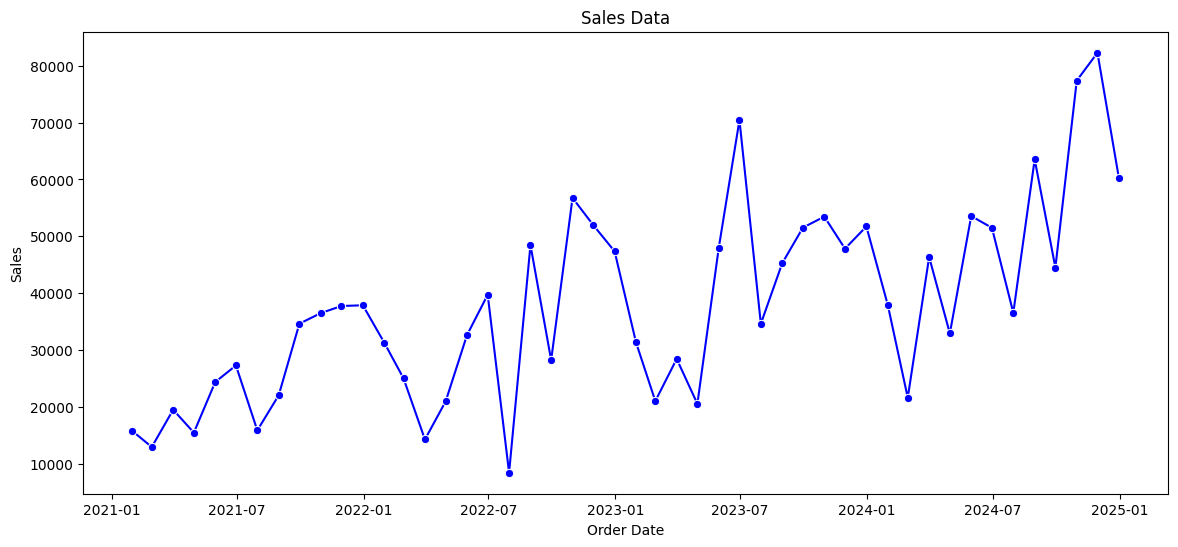

In [13]:
# Plot the time series data
plt.figure(figsize = (14, 6))
sns.lineplot(data = df, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.title('Sales Data');

# Part 2 - Stationarity Analysis
In this part of the demonstration, we will perform tests on the time series data to understand whether it is stationary or not. Recall that autoregressive modeling requires the time series data to be stationary. To test this, we will use the following tests:
- Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test
- Augmented Dickey–Fuller (ADF) test

### Subpart 1 - KPSS Test

We will now check the time series for stationarity using the KPSS test. Let's import the *kpss* method from *statsmodels* to execute this.

In [14]:
# Import the 'kpss' method from 'statsmodels' for executing the KPSS test
from statsmodels.tsa.stattools import kpss

Note that the null hypothesis for the KPSS test is *The time series is stationary*.

In [15]:
# Use the KPSS test to check for the stationarity of the 'Sales' variable
kpss_test_result = kpss(df['Sales'])
print('The p-value for the KPSS test is ', np.round(kpss_test_result[1], 2))

The p-value for the KPSS test is  0.01


The $p$-value here is less than $0.05$, so the null hypothesis may be rejected. Hence, the time series is not stationary.

### Subpart 2 - ADF Test

We will now check the time series for stationarity using the ADF test. Let's import the *adfuller* method from *statsmodels* to execute this.

In [16]:
from statsmodels.tsa.stattools import adfuller

Note that the null hypothesis for the ADF test is *The time series is not stationary*.

In [17]:
# Use the ADF test to check for the stationarity of the 'Sales' variable
adf_test_result = adfuller(df['Sales'])
print('The p-value for the ADF test is ', np.round(adf_test_result[1], 2))

The p-value for the ADF test is  0.2


The $p$-value here is greater than $0.05$, so we fail to reject the null hypothesis. Hence, the time series is not stationary.



Therefore, we can proceed under the assumption that differencing or another transformation is required to make the series stationary.

We have analysed our time series data. Let's now split the data into training and testing sets so that we're ready to build and evaluate time series models on the data.

In [18]:
# Split the data into training and testing data sets
train_len = 42
df_train = df[:train_len] # first 42 months as training set
df_test = df[train_len:] # last 6 months as out-of-time test set

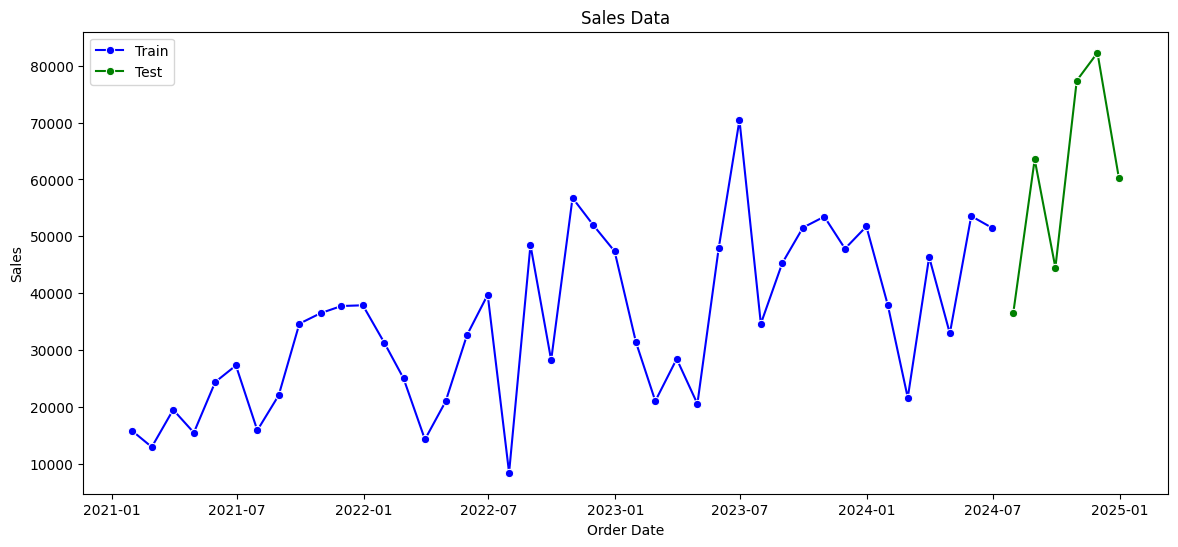

In [19]:
# Plot the time series data with the train-test split
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
plt.title('Sales Data');

# Part 3 - Time Series Transformations
In this part of the demonstration, we will transform the time series data so that it ends up having a more stationary mean and variance. To do this, we will use the following data transformations:
- Box-Cox transformation
- Differencing

Box-Cox transformation is used to make the variance of a time series stationary and differencing is used to make its mean stationary. Note that although these methods can be executed in any order, differencing is done after Box-Cox transformation in general.

### Subpart 1 - Box-Cox Transformation

The Box-Cox transformation is used to stabilise the variance of a time series. It involves the application of a power transformation to the time series data. Let's import the *boxcox* method from *scipy* to implement this transformation.

In [20]:
# Import the 'boxcox' method from 'scipy' to implement the Box-Cox transformation
from scipy.stats import boxcox

Note that from here on out, we will only perform data transformations on the training data to avoid data leakage.

In [21]:
# Use the 'boxcox' method to transform the 'Sales' variable
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)

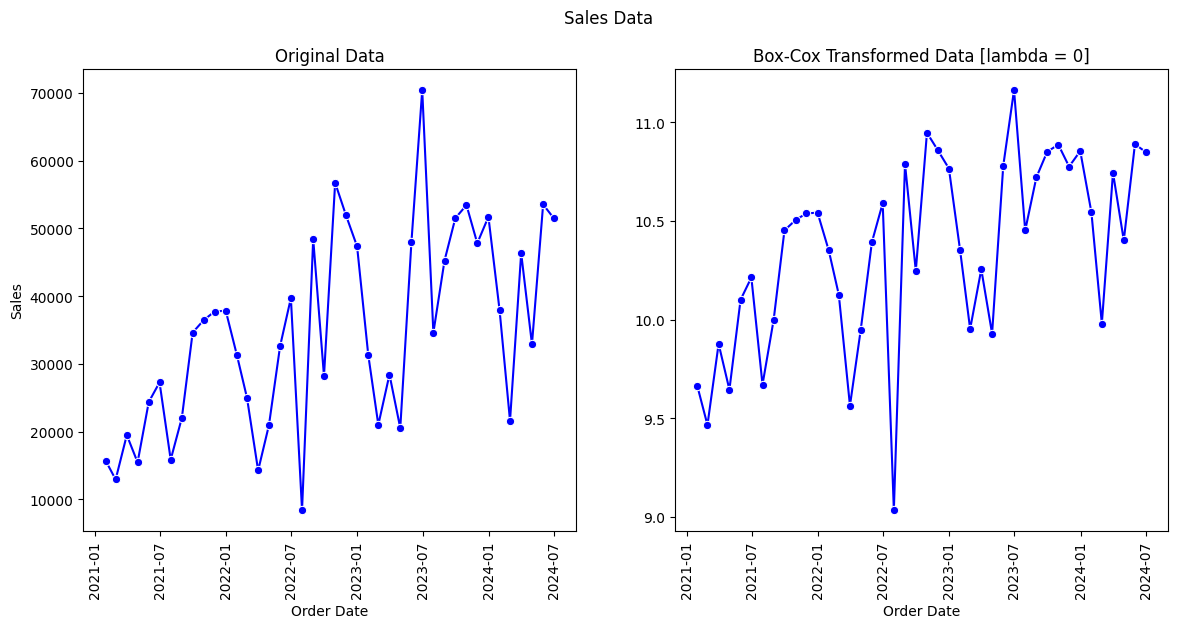

In [22]:
# Plot the original time series data and its Box-Cox transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.suptitle('Sales Data');

Note that the value of $\lambda$ controls the effect of the transformation on the data. We can analyse the impact of different values of $\lambda$ on the resulting transformed version of the time series.

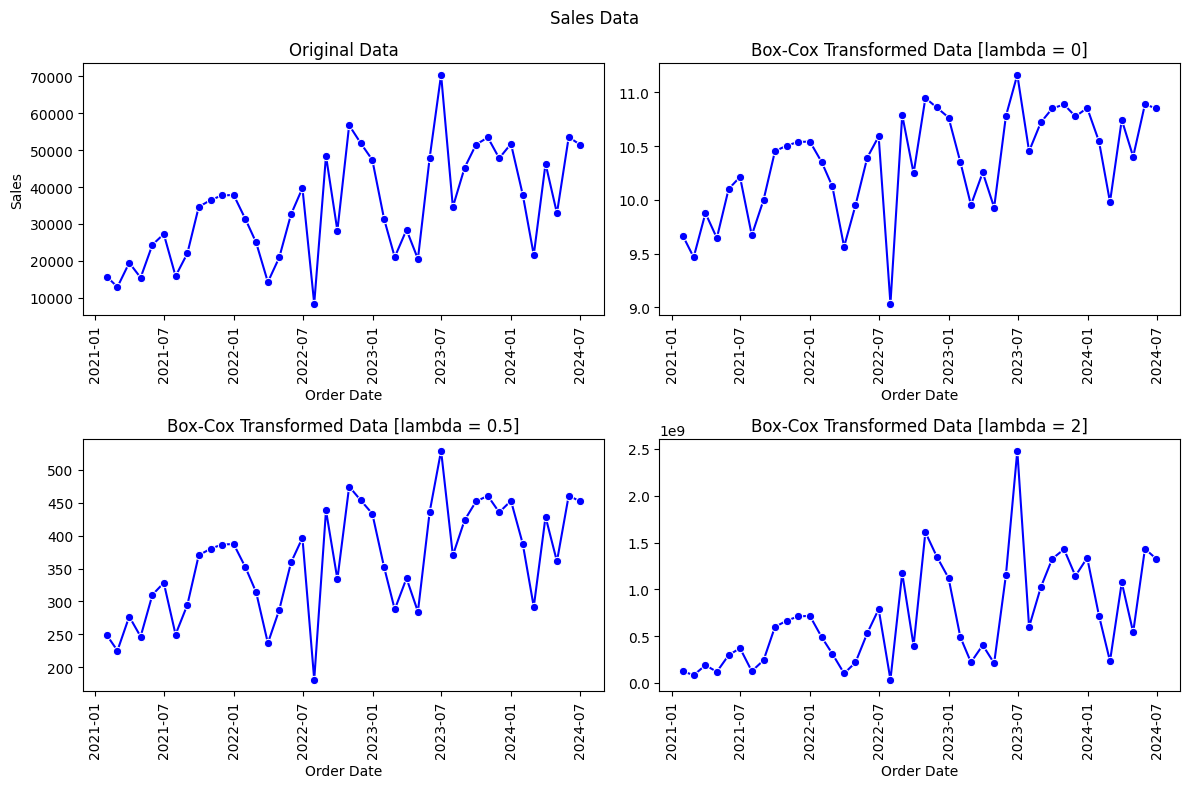

In [23]:
# Look at the effect of 'lambda' on the transformed version of the time series data
lambda_vals = [0, 0.5, 2]
df_boxcox_vals = [None] * len(lambda_vals)

i = -1
for lambda_val in lambda_vals:
    i = i + 1
    df_boxcox_vals[i] = pd.Series(boxcox(df_train['Sales'], lmbda = lambda_val), index = df_train.index)

plt.figure(figsize = (12, 8))

plt.subplot(2, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(2, 2, 2)
sns.lineplot(x = df_boxcox_vals[0].index, y = df_boxcox_vals[0].values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0]')

plt.subplot(2, 2, 3)
sns.lineplot(x = df_boxcox_vals[1].index, y = df_boxcox_vals[1].values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 0.5]')

plt.subplot(2, 2, 4)
sns.lineplot(x = df_boxcox_vals[2].index, y = df_boxcox_vals[2].values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Box-Cox Transformed Data [lambda = 2]')

plt.suptitle('Sales Data')

plt.tight_layout();

We will continue with $\lambda = 0$ for the remainder of the demonstration. However, you are free to analyse the impact of other $\lambda$ values on the variance of the time series data.

### Subpart 2 - Differencing

Differencing is used to stabilise the mean of a time series. It involves taking the difference of consecutive data points in the time series. If this process is executed once, it is known as first-order differencing. If done twice, it is called second-order differencing. And so on.

In [24]:
# Obtain the first-order differenced version of the time series data
df_differenced = df['Sales'] - df['Sales'].shift()

Note that differencing results in a missing value at the beginning of the series, but this is not of much consequence for the analysis.

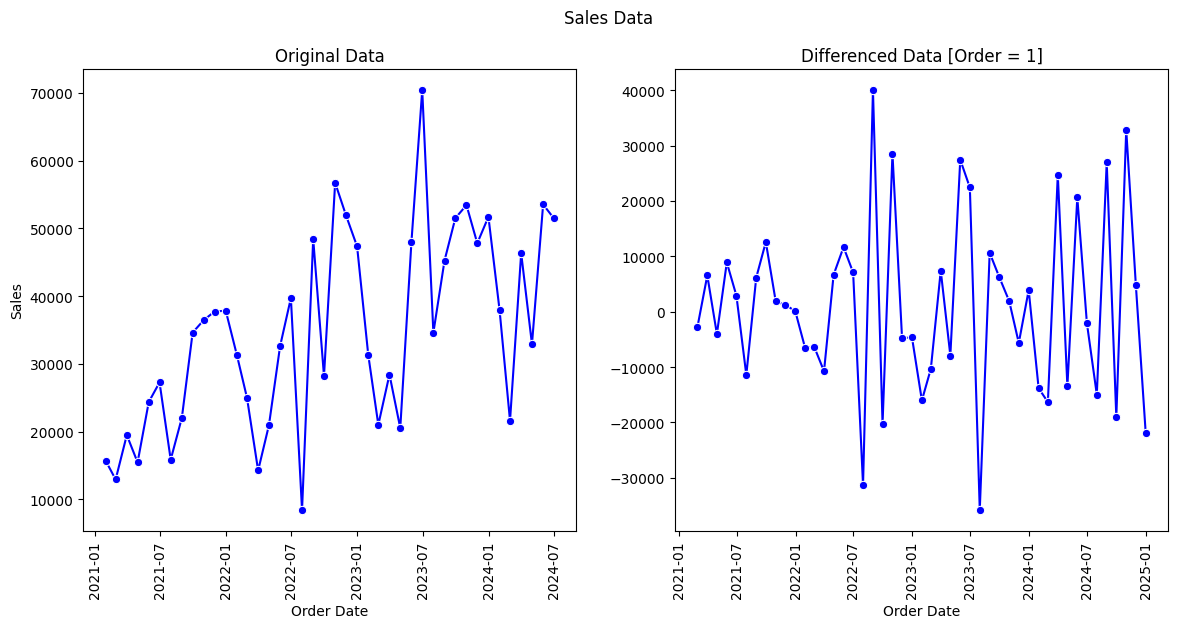

In [25]:
# Plot the original time series data and its first-order differenced version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')

plt.suptitle('Sales Data');

We will continue with difference order $=1$ for the remainder of the demonstration. However, you are free to analyse the impact of other order values on the mean of the time series data.

### Subpart 3 - Transformed Time Series Data

We will now apply the Box-Cox and the differencing transformations on the training data so that the data is ready for autoregressive time series modelling.

In [26]:
# Apply the Box-Cox and differencing transformations on the training data
df_boxcox = pd.Series(boxcox(df_train['Sales'], lmbda = 0), index = df_train.index)
df_boxcox_diff = df_boxcox - df_boxcox.shift()

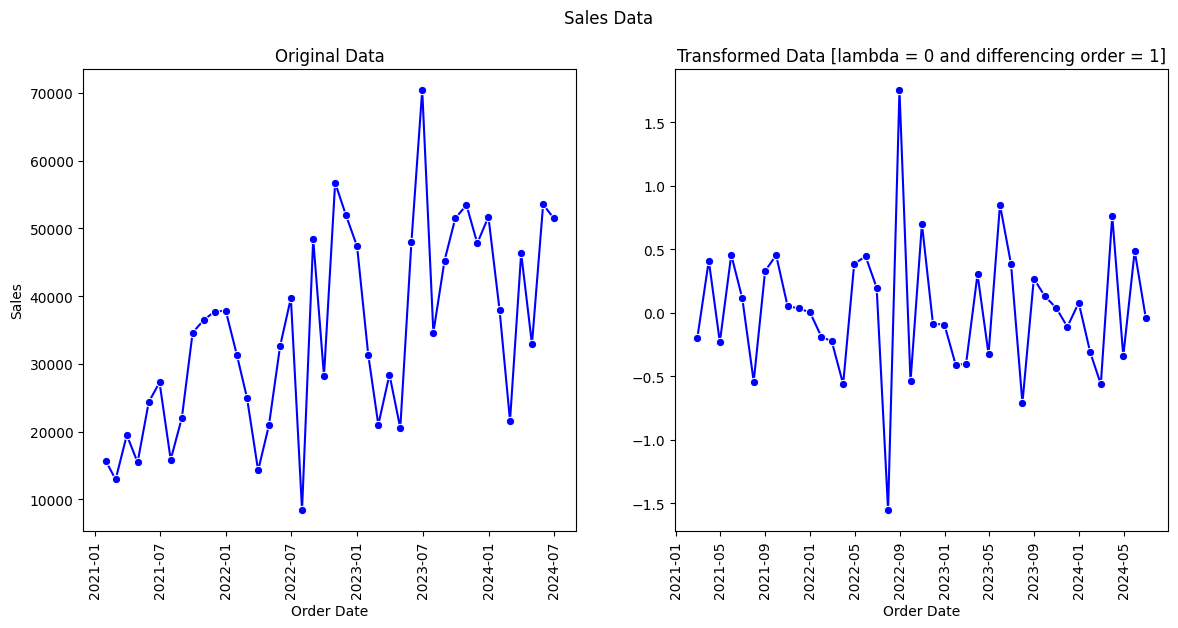

In [27]:
# Plot the original time series data and its transformed version
plt.figure(figsize = (14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.lineplot(x = df_boxcox_diff.index, y = df_boxcox_diff.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')

plt.suptitle('Sales Data');

# Part 4 - Autocorrelation Plots
In this part of the demonstration, we will compute and visualise the autocorrelation function (ACF) and the partial autocorrelation function (PACF) plots for the time series data.

### Subpart 1 - Autocorrelation Function (ACF) Plot

The autocorrelation function (ACF) plot shows the autocorrelation values of a time series for different lag orders. Let's import the *plot_acf* method from *statsmodels* to implement this.

In [28]:
# Import 'plot_acf' from 'statsmodels' to compute and visualise the autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_acf

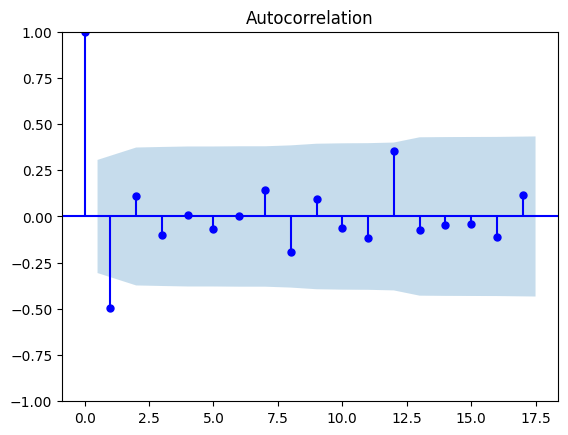

In [29]:
# Use the 'plot_acf' method to look at the autocorrelation values for the training data for various lag orders
# Note: The 'plot_acf' method assumes stationarity of time series, so we will use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_acf(x = df_boxcox_diff[1:], color = 'blue', vlines_kwargs = {'colors': 'blue'});

We can see a strong autocorrelation value at lag order $=1$. There are other lag order values where it is strong as well, such as $8$ and $12$, but $1$ is the strongest.

### Subpart 2 - Partial Autocorrelation Function (PACF) Plot

The partial autocorrelation function (PACF) plot shows the partial autocorrelation values of a time series for different lag orders. Partial autocorrelation is computed such that it ignores short-term correlations in the data. Let's import the *plot_pacf* method from *statsmodels* to implement this.

In [30]:
# Import 'plot_pacf' from 'statsmodels' to compute and visualise the partial autocorrelation function (ACF) for the time series
from statsmodels.graphics.tsaplots import plot_pacf

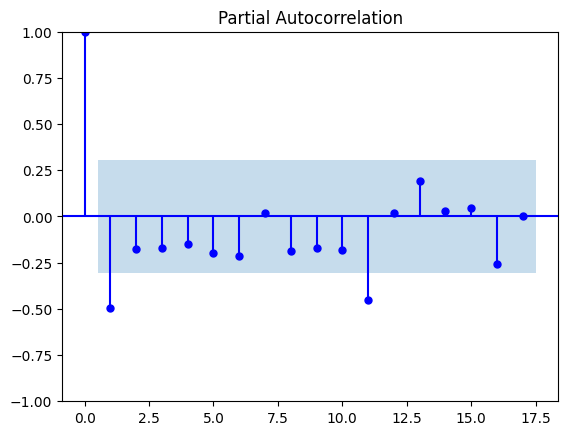

In [31]:
# Use the 'plot_pacf' method to look at the partial autocorrelation values for the training data for various lag orders
# Note: The 'plot_pacf' method assumes stationarity of time series, so we will use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_pacf(x = df_boxcox_diff[1:], color = 'blue', vlines_kwargs = {'colors': 'blue'});

We can see strong partial autocorrelation values at lag orders $1$ and $11$.

# Part 5 - Autoregressive Models
In this part of the demonstration, we will fit autoregressive models to the data and analyse their performance using RMSE and MAPE values. We will build the following models:
- Autoregressive (AR)
- Moving average (MA)
- Autoregressive moving average (ARMA)
- Autoregressive integrated moving average (ARIMA)
- Seasonal autoregressive integrated moving average (SARIMA)

### Subpart 1 - Autoregressive (AR) Method

We will begin by fitting a basic autoregressive model to the training data and analyse its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

Let's import the *ARIMA* method from *statsmodels*.

In [32]:
# Import 'ARIMA' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.arima.model import ARIMA

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

For the AR method, we will specify the first value in this tuple. This is the $p$ value or the lag order obtained from the PACF plot.

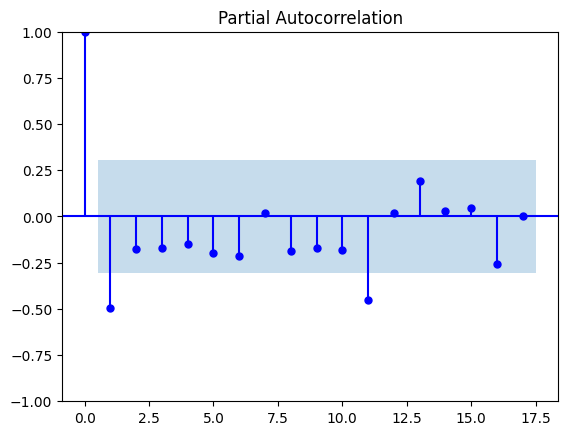

In [33]:
# Use the 'plot_pacf' method to look at the partial autocorrelation values for the training data for various lag orders
# Note: The 'plot_pacf' method assumes stationarity of time series, so we will use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_pacf(x = df_boxcox_diff[1:], color = 'blue', vlines_kwargs = {'colors': 'blue'});

In [34]:
# Fit an AR model to the transformed training data with lag order 9 and view its optimal parameter values
# Note: You may try other suitable lag order values as well
# Note: ARIMA(9, 0, 0) = AR(9)
ar_model = ARIMA(endog = df_boxcox_diff, order = (9, 0, 0))
ar_model = ar_model.fit()
ar_model.params

,0
const,0.023874
ar.L1,-0.724734
ar.L2,-0.476271
ar.L3,-0.512052
ar.L4,-0.485497
ar.L5,-0.485059
ar.L6,-0.358783
ar.L7,-0.187571
ar.L8,-0.318166
ar.L9,-0.179242


In [35]:
# Obtain predictions from the AR model for the testing data indices
ar_model_preds = ar_model.predict(start = train_len, end = len(df) - 1)

In [36]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat(objs = [df_boxcox_diff, ar_model_preds], axis = 0)

In [37]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])

In [38]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualise the predictions along with the data before computing error measures.

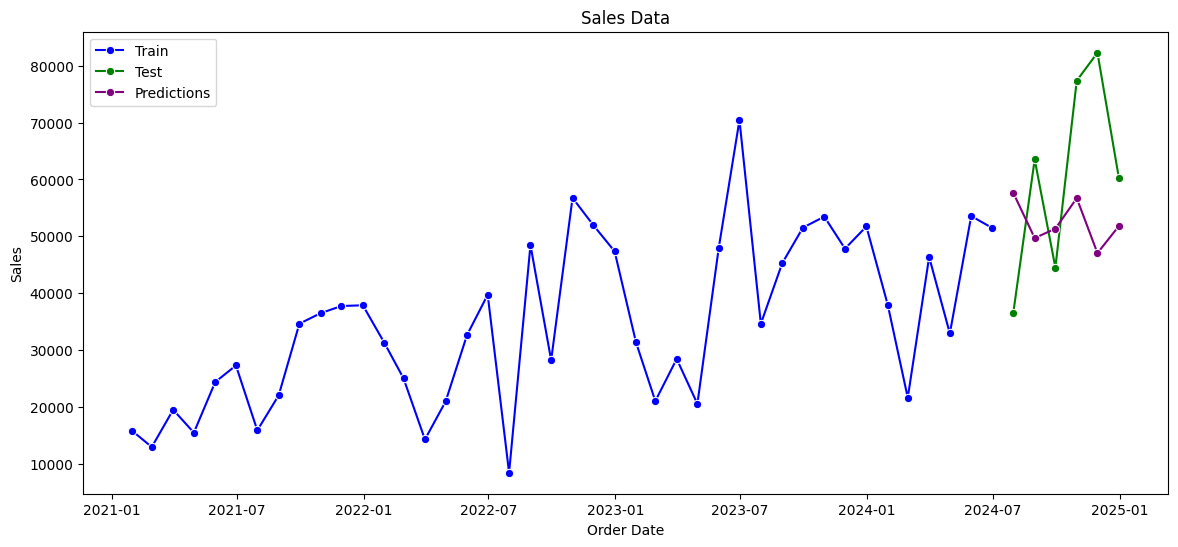

In [39]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model. But to do that, we will first import the *mean_squared_error* function from *sklearn*.

In [40]:
# Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

In [41]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))
mape = np.mean(np.abs(df_test['Sales'] - df_preds.values[train_len:]) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df = pd.DataFrame(index = [0],
                              data = {'Model': 'AR', 'RMSE': rmse, 'MAPE': mape})

performance_df.set_index(keys = 'Model', inplace = True)

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78


### Subpart 2 - Moving Average (MA) Method

We will now a fit a moving average model to the training data and analyse its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

For the MA method, we will specify the third value in this tuple. This is the $q$ value or the lag order obtained from the ACF plot.

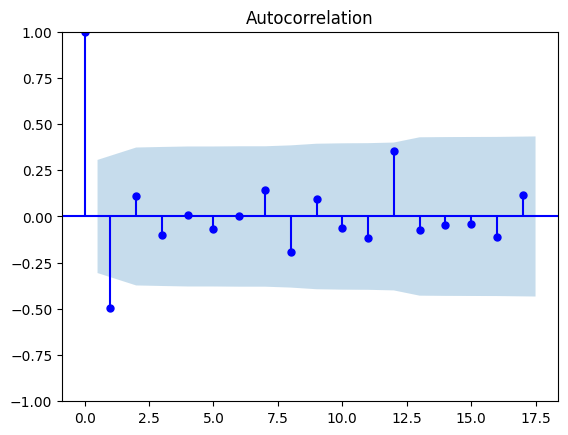

In [42]:
# Use the 'plot_acf' method to look at the autocorrelation values for the training data for various lag orders
# Note: The 'plot_acf' method assumes stationarity of time series, so we will use the 'df_boxcox_diff' data
# Note: Since differencing results in a missing value at the beginning, we must exclude it
plot_acf(x = df_boxcox_diff[1:], color = 'blue', vlines_kwargs = {'colors': 'blue'});

In [43]:
# Fit an MA model to the transformed training data with lag order 1 and view its optimal parameter values
# Note: ARIMA(0, 0, 1) = MA(1)
ma_model = ARIMA(endog = df_boxcox_diff, order = (0, 0, 1))
ma_model = ma_model.fit()
ma_model.params

,0
const,0.022689
ma.L1,-0.999630
sigma2,0.155059


In [44]:
# Obtain predictions from the MA model for the testing data indices
ma_model_preds = ma_model.predict(start = train_len, end = len(df) - 1)

In [45]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat(objs = [df_boxcox_diff, ma_model_preds], axis = 0)

In [46]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])

In [47]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualise the predictions along with the data before computing error measures.

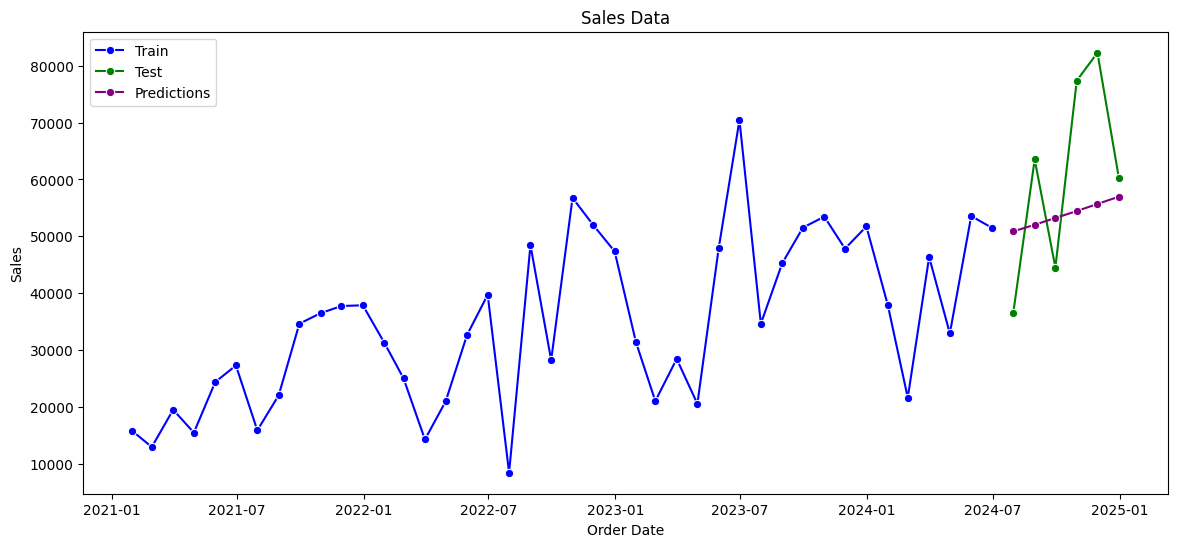

In [48]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [49]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))
mape = np.mean(np.abs(df_test['Sales'] - df_preds.values[train_len:]) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'MA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78
MA,16630.89,24.08


### Subpart 3 - Autoregressive Moving Average (ARMA) Method

We will now a fit an autoregressive moving average model to the training data and analyse its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

For the ARMA method, we will specify the first and the third values in this tuple. These are the $p$ and $q$ values or the lag orders obtained from the PACF and the ACF plots respectively.

Recall that suitable values of $p$ and $q$ for the data are respectively $9$ and $1$.

In [50]:
# Fit an ARMA model to the transformed training data with 'p = 9' and 'q = 1' and view its optimal parameter values
# Note: ARIMA(9, 0, 1) = ARMA(9, 1)
arma_model = ARIMA(endog = df_boxcox_diff, order = (9, 0, 1))
arma_model = arma_model.fit()
arma_model.params

,0
const,0.021605
ar.L1,-0.191929
ar.L2,-0.055387
ar.L3,-0.307985
ar.L4,-0.272053
ar.L5,-0.342383
ar.L6,-0.215148
ar.L7,-0.090018
ar.L8,-0.367289
ar.L9,-0.241845


In [51]:
# Obtain predictions from the ARMA model for the testing data indices
arma_model_preds = arma_model.predict(start = train_len, end = len(df) - 1)

In [52]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat(objs = [df_boxcox_diff, arma_model_preds], axis = 0)

In [53]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])

In [54]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualise the predictions along with the data before computing error measures.

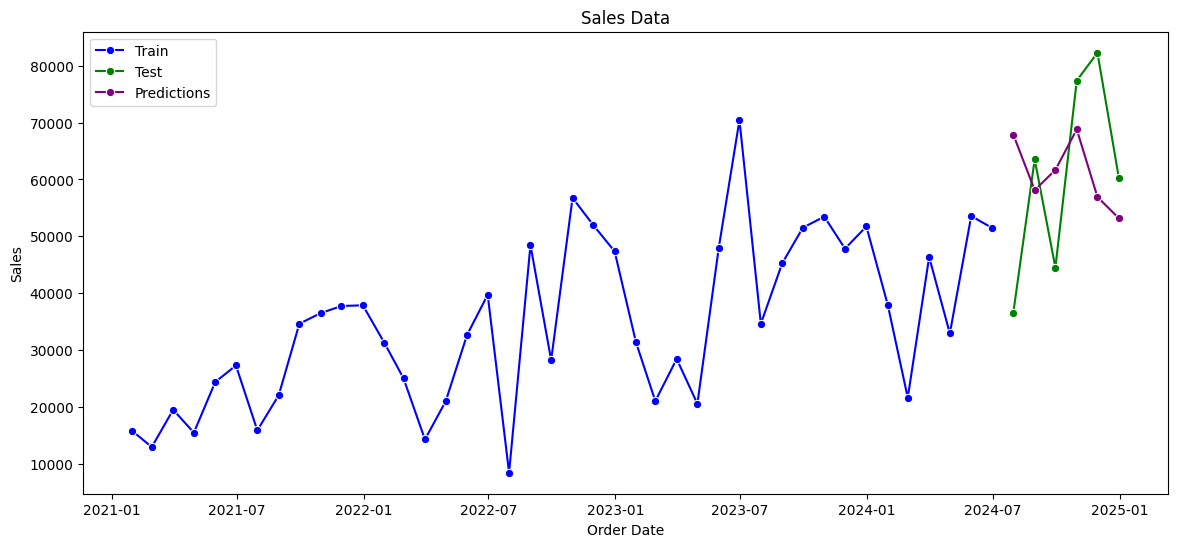

In [55]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [56]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))
mape = np.mean(np.abs(df_test['Sales'] - df_preds.values[train_len:]) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'ARMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78
MA,16630.89,24.08
ARMA,18603.92,31.13


### Subpart 4 - Autoregressive Integrated Moving Average (ARIMA) Method

We will now a fit an autoregressive integrated moving average model to the training data and analyse its performance. We will use the *ARIMA* method from *statsmodels* to build the model.

**Note:** The *ARIMA* method can also be used to implement other autoregressive models.

The parameter of interest in the *ARIMA* method is the *order* parameter. It is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$.

For the ARIMA method, we will specify all the values in this tuple. The first and the third values are the $p$ and $q$ values or the lag orders obtained from the PACF and the ACF plots respectively. The second value in the tuple is $d$ or the differencing order which we shall set as $1$.

In [57]:
# Fit an ARIMA model to the transformed training data with 'p = 9', 'd = 1' and 'q = 1' and view its optimal parameter values
# Note: Since differencing is integrated into the ARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
arima_model = ARIMA(endog = df_boxcox, order = (9, 1, 1))
arima_model = arima_model.fit()
arima_model.params

,0
ar.L1,-0.153576
ar.L2,-0.073323
ar.L3,-0.243665
ar.L4,-0.236497
ar.L5,-0.249675
ar.L6,-0.115607
ar.L7,-0.037019
ar.L8,-0.289794
ar.L9,-0.126932
ma.L1,-0.580181


In [58]:
# Obtain predictions from the ARIMA model for the testing data indices
arima_model_preds = arima_model.predict(start = train_len, end = len(df) - 1)

In [59]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat(objs = [df_boxcox, arima_model_preds], axis = 0)

In [60]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualise the predictions along with the data before computing error measures.

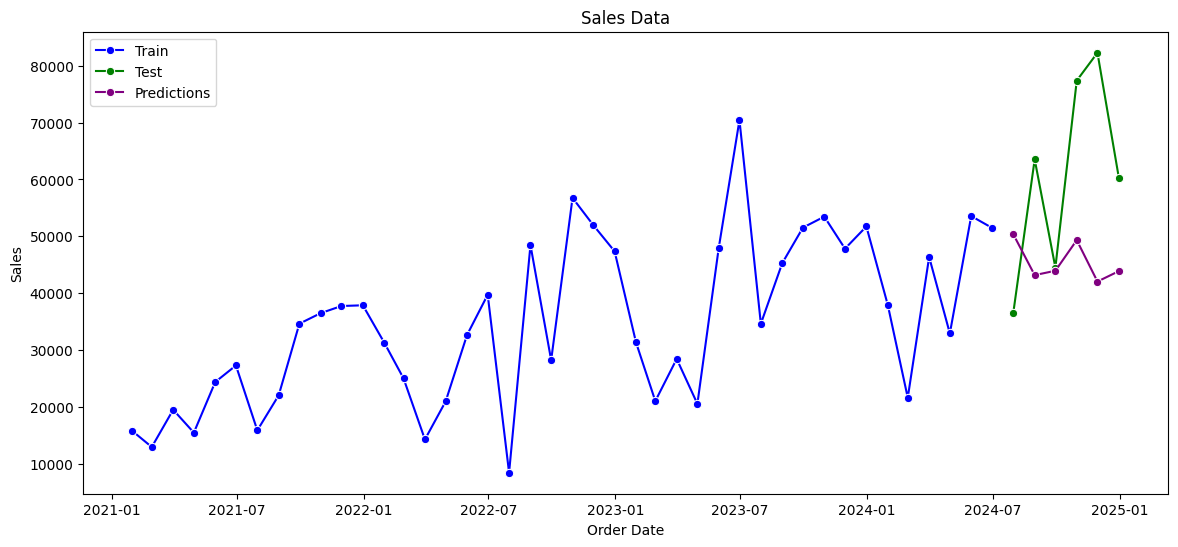

In [61]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [62]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))
mape = np.mean(np.abs(df_test['Sales'] - df_preds.values[train_len:]) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'ARIMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78
MA,16630.89,24.08
ARMA,18603.92,31.13
ARIMA,23398.12,30.60


### Subpart 5 - Seasonal Autoregressive Integrated Moving Average (SARIMA) Method

We will now a fit a seasonal autoregressive integrated moving average model to the training data and analyse its performance. We will use the *SARIMAX* method from *statsmodels* to build the model.

Let's import the *SARIMAX* method from *statsmodels*.

In [63]:
# Import 'SARIMAX' from 'statsmodels' for building autoregressive models
from statsmodels.tsa.statespace.sarimax import SARIMAX

The parameters of interest in the *SARIMAX* method are the *order* and the *seasonal_order* parameters. The *order* parameter is a 3-tuple of the form $(p, d, q)$ with the default value as $(0, 0, 0)$ and the *seasonal_order* parameter is a 4-tuple of the form $(P, D, Q, m)$ with the default value as $(0, 0, 0, 0)$.

For the SARIMA method, we will specify all the values in the two tuples.

The *seasonal_order* parameter specifies the lag and difference orders for the seasonal component of the model, along with its period.

In [64]:
# Fit a SARIMA model to the transformed training data with 'p = 9', 'd = 1' and 'q = 1' and view its optimal parameter values
# Note: We know that the seasonality period in the data is 'm = 12'
# Note: We will use 'P = 1', 'D = 1' and 'Q = 1', but you are free to experiment with other values
# Note: Since differencing is integrated into the SARIMA method, we will use 'df_boxcox' instead of 'df_boxcox_diff'
sarima_model = SARIMAX(endog = df_boxcox, order = (9, 1, 1), seasonal_order = (1, 1, 1, 12))
sarima_model = sarima_model.fit()
sarima_model.params

,0
ar.L1,-0.143990
ar.L2,0.032183
ar.L3,0.018868
ar.L4,0.159405
ar.L5,-0.321730
ar.L6,-0.218338
ar.L7,-0.032135
ar.L8,0.028109
ar.L9,0.345532
ma.L1,-0.828198


In [65]:
# Obtain predictions from the SARIMA model for the testing data indices
sarima_model_preds = sarima_model.predict(start = train_len, end = len(df) - 1)

In [66]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat(objs = [df_boxcox, sarima_model_preds], axis = 0)

In [67]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

Let's visualise the predictions along with the data before computing error measures.

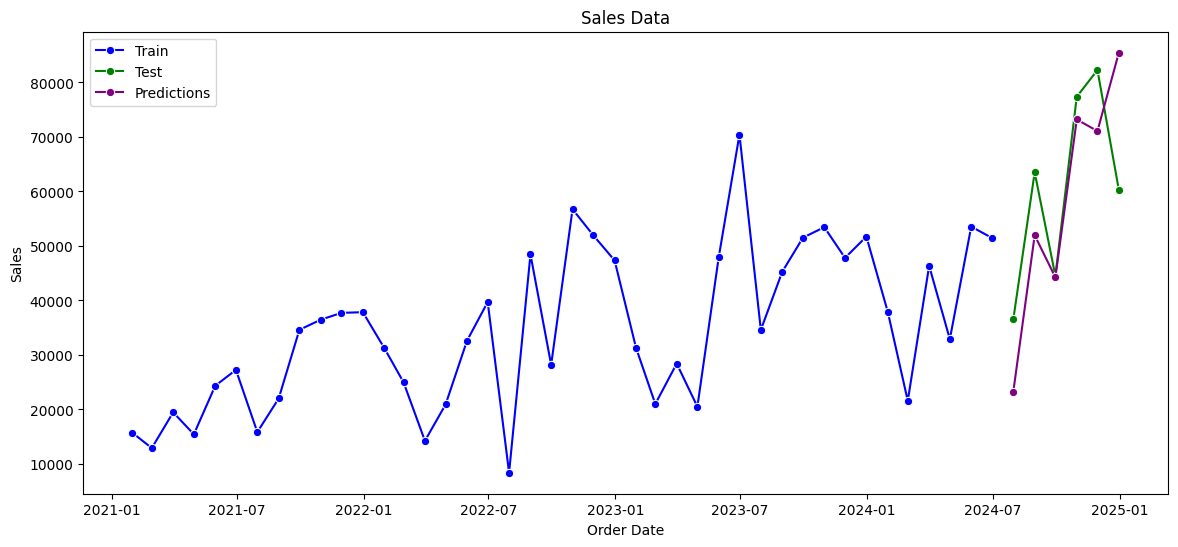

In [68]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [69]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_preds.values[train_len:]))
mape = np.mean(np.abs(df_test['Sales'] - df_preds.values[train_len:]) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'SARIMA', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78
MA,16630.89,24.08
ARMA,18603.92,31.13
ARIMA,23398.12,30.60
SARIMA,13454.04,19.30


# Part 6 - Recurrent Neural Networks
In this part of the demonstration, we will fit a simple RNN model to the data and analyse its performance using RMSE and MAPE values.

Before we continue, let's import methods required for building recurrent neural networks.

In [70]:
# Import methods for building and training neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

### Subpart 1 - Data Preparation

We will begin by preparing the time series data so that it is ready for modelling using neural networks. We will define some helper functions that will help in executing the data preparation.

In [71]:
# Define a function that scales the time series variable
# Note: Other scaling methods may be used as well
def scale_data(time_series = None, scaling_parameter = 1):

    # Scale the time series by a scalar value
    scaled_time_series = time_series / scaling_parameter

    return(scaled_time_series)

In [72]:
# Define a function to create input and output data points from the training data
# Note: Controllable parameters here are 'window_size' and 'window_stride'
def create_data_instances(time_series = None,
                          window_size = 1,
                          window_stride = 1):

    # Create lists for storing the windowed data
    X_train_data = []
    y_train_data = []

    # Iterate through the input time series data
    # Start from the first element of the input time series and stop at the first element of the last possible window
    # Use 'window_stride' as the step size in the loop
    for i in np.arange(0, len(time_series) - window_size - len(df_test), window_stride):

        # Extract and store the current X window
        data_point = time_series.iloc[(i):(i + window_size)]
        X_train_data.append(data_point)

        # Extract and store the y value(s) associated with the current X window
        y_val = time_series.iloc[(i + window_size):(i + window_size + len(df_test))]
        y_train_data.append(y_val)

    return X_train_data, y_train_data

We will now use the helper functions to create the training and testing data sets for modelling using neural networks.

In [73]:
# Scale the training and testing data
scale_value = 10**5
df_train_scaled = scale_data(time_series = df_train, scaling_parameter = scale_value)
df_test_scaled = scale_data(time_series = df_test, scaling_parameter = scale_value)

In [74]:
# Create data instances from the training data using a window size of 10 and a window stride of 1
window_size = 10
window_stride = 1

X_train, y_train = create_data_instances(time_series = df_train_scaled,
                                         window_size = window_size,
                                         window_stride = window_stride)

In [75]:
# Check the number of data points generated
print('Number of training data points generated = {}'.format(len(y_train)))

Number of training data points generated = 26


In [76]:
# Convert the training and testing data into numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
y_test = np.array(df_test_scaled)

In [77]:
# Check the dimensions of the training and testing data
print('Shape of training data input = {}'.format(X_train.shape))
print('Shape of training data output = {}'.format(y_train.shape))

Shape of training data input = (26, 10, 1)
Shape of training data output = (26, 6, 1)


In [78]:
# Store input data shape for RNNs, LSTM networks and GRU networks
inputdims = (X_train.shape[1], X_train.shape[2])

### Subpart 2 - Simple RNN

We will now build a simple RNN network for the training data and evaluate it on the testing data.

In [79]:
# Create a simple RNN model for the data and specify its architecture
cells_config = [2, 4, 8, 16, 32]
n_rnn = len(cells_config)
rnn_activation = 'tanh'

# Initialise the RNN model and specify the input layer
rnn = Sequential()
rnn.add(Input(shape = inputdims))

# Add recurrent layers to the model
for i in np.arange(0, n_rnn - 1, 1):
    rnn.add(SimpleRNN(units = cells_config[i],
                      return_sequences = True,
                      activation = rnn_activation))

# Add the final recurrent layer
rnn.add(SimpleRNN(units = cells_config[n_rnn - 1],
                  return_sequences = False,
                  activation = rnn_activation))

# Add the output layer
rnn.add(Dense(units = len(df_test),
              activation = 'linear'))

# Compile the network
rnn.compile(loss = 'mean_squared_error',
            optimizer = Adam(learning_rate = 0.01))

In [80]:
# Train the model
rnn.fit(X_train, y_train, epochs = 25)

Epoch 1/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.4490
Epoch 2/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1136
Epoch 3/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0565
Epoch 4/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0386
Epoch 5/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0439
Epoch 6/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0378
Epoch 7/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0295
Epoch 8/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0331
Epoch 9/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0352
Epoch 10/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0297
Epoch 11/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.0259
Epoch 12/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0272
Epoch 13/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0294
Epoch 14/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0287
Epoch 15/25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0253
Epoch 16/25
1/1 ━━━━━━━━━━━━━━━━━━━━

In [81]:
# Define the prediction input window for the simple RNN model
pred_input = np.array(df_train_scaled[(len(df_train) - window_size):])
pred_input = np.transpose(pred_input, (1, 0))

In [82]:
# Obtain predictions from the simple RNN model for the testing data indices
preds = rnn.predict(pred_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [83]:
# Reverse the scaling transformation on the predictions
preds = preds[0] * scale_value

In [84]:
# Provide an index to the predicted values
df_rnn_preds = pd.Series(data = preds, index = df_preds.index[train_len:])

Let's visualise the predictions along with the data before computing error measures.

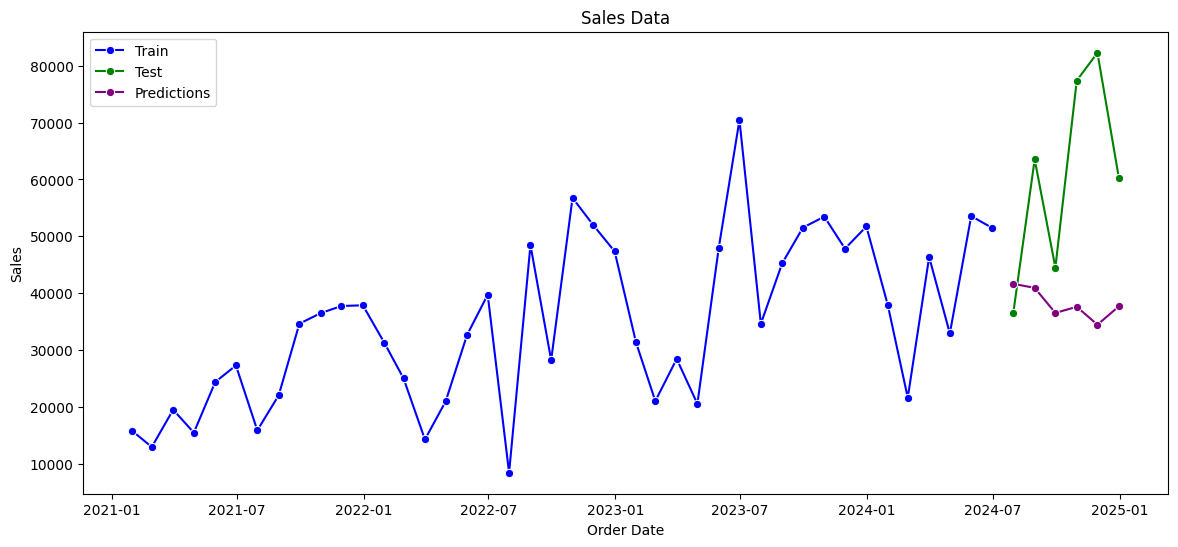

In [85]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Order Date', y = 'Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_rnn_preds.index, y = df_rnn_preds.values, marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

Next, let's compute performance metrics for the model.

In [86]:
# Summarise the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['Sales'], y_pred = df_rnn_preds.values))
mape = np.mean(np.abs(df_test['Sales'] - df_rnn_preds.values) / df_test['Sales'] * 100)

rmse = np.round(rmse, 2)
mape = np.round(mape, 2)

performance_df_temp = pd.DataFrame(index = [0],
                                   data = {'Model': 'Simple RNN', 'RMSE': rmse, 'MAPE': mape})

performance_df_temp.set_index(keys = 'Model', inplace = True)

performance_df = pd.concat(objs = [performance_df, performance_df_temp])

performance_df

,RMSE,MAPE
Model,,
AR,20113.25,29.78
MA,16630.89,24.08
ARMA,18603.92,31.13
ARIMA,23398.12,30.60
SARIMA,13454.04,19.30
Simple RNN,28828.66,35.77
